In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
weather_data = np.random.uniform(low=-10.99, high=40.99, size=(52, 7))

In [3]:
days_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df = pd.DataFrame(weather_data, columns=days_of_week)

In [4]:
df['Mean'] = df.mean(axis=1)

In [5]:
top_25_weeks = df.nlargest(25, 'Mean')

In [6]:
week_numbers = top_25_weeks.index.tolist()
mean_temperatures = top_25_weeks['Mean'].values
top_25_results = np.column_stack((week_numbers, mean_temperatures))
top_25_results = top_25_results[np.argsort(top_25_results[:, 1])[::-1]]

In [7]:
print("Top 25 Weekly Means:")
print(top_25_results[:10])

Top 25 Weekly Means:
[[ 7.         28.24504171]
 [16.         27.07037614]
 [39.         25.18895551]
 [35.         24.79699424]
 [26.         23.3318908 ]
 [38.         22.71628018]
 [43.         20.57388883]
 [13.         20.57183762]
 [46.         20.33588313]
 [ 1.         20.27700836]]


In [8]:
top_25_df = df.loc[top_25_weeks.index]

In [9]:
top_25_df['Weekend Mean'] = top_25_df[['Sat', 'Sun']].mean(axis=1)

In [10]:
top_25_df['Weekend Mean Delta'] = top_25_df['Weekend Mean'] - top_25_df['Mean']

In [11]:
filtered_df = top_25_df[top_25_df['Weekend Mean Delta'] >= 5]

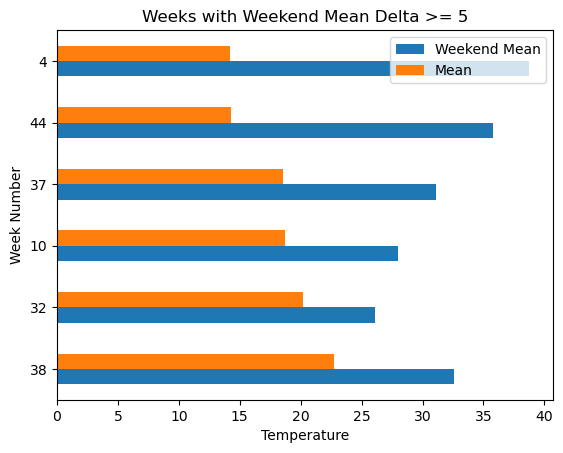

In [12]:
filtered_df.plot(kind='barh', y=['Weekend Mean', 'Mean'], title='Weeks with Weekend Mean Delta >= 5')
plt.xlabel('Temperature')
plt.ylabel('Week Number')
plt.show()